<h1 style="color:#2E86C1;">Project 5 — Housing Price Prediction & Model Evaluation</h1>
<hr>
<h3>Analyst: Carl Kien Carabido</h3>
<p>
This project demonstrates training and evaluating Decision Tree and Linear Regression models to predict house sale prices, and compares their performance on both training and test datasets.
</p>

## Step 1: Specify Prediction Target
Select the target variable, which corresponds to the sales price. Save this to a new variable called <b>y</b>. <br> 
You'll need to print a list of the columns to find the name of the column you need.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load dataset (replace with your housing dataset file path)
housing = pd.read_csv("datasets\\housing_train.csv")

y = housing['SalePrice']

## Step 2: Create X
Now you will create a DataFrame called X holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in X.

You'll use just the following columns in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):
- LotArea
- YearBuilt
- 1stFlrSF
- 2ndFlrSF
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd
After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

In [2]:
#select columns related to making prediction values 
#feature selection / select columns 

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',  'TotRmsAbvGrd']

X = housing[features]

In [3]:
X

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


<strong>Check:</strong> When you've updated the starter code, check() will tell you whether your code is correct. 
You need to update the code that creates variable <b>X</b>

### Review Data
- Before building a model, take a quick look at X to verify it looks sensible

## Step 3: Specify and Fit Model¶

- Create a DecisionTreeRegressor and save it iowa_model. Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in X and y that you saved above.

<hr>
<strong>What is a Decision Tree Regressor </strong>
<p>A decision tree regressor is a machine learning model that uses a tree-like structure to predict a continuous target variable . It works by recursively partitioning the data into smaller and smaller subsets based on the features, ultimately fitting a simple model (like the mean or median of the target variable) to each subset</p>
<img src= 'https://miro.medium.com/1*62Am0QdlxCq5Vmt5siR-7Q.png' />

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Define model
dt_model = DecisionTreeRegressor()

# Fit model
dt_model.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


<img src="images/DTR1.png" width="300">

## Step 4: Make Predictions
Make predictions with the model's predict command using X as the data. Save the results to a variable called predictions.

In [5]:
# Make predictions
predictions = dt_model.predict(X)



In [6]:
predictions

array([208500., 181500., 223500., ..., 266500., 142125., 147500.],
      shape=(1460,))

## Step 5: TESTING THE ACCURACY OF PREDICTIONS
Since the sales prices are continuing data or ordinal data. 



In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y, predictions)
print("R² Score:", r2)


R² Score: 0.9999346278363472


<hr>
<strong>What is a Linear Regression Model</strong>
<p>Linear Regression is a machine learning model that predicts a continuous target variable by fitting a straight line (or hyperplane) to the data. It works by finding the best-fitting line that minimizes the difference between the actual and predicted values, based on a linear relationship between the features and the target variable.</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" alt="Linear Regression Illustration" />

In [8]:
from sklearn.linear_model import LinearRegression

# Define model
my_model = LinearRegression()

# Fit model
my_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<img src="images/LR1.png" width="200">

## Step 4: Make Predictions

- Use the model's `predict` method to make predictions on the feature data `X`.  
- Save the predicted values to a variable called `predictions`.

In [9]:
# Make predictions
LRpredictions = my_model.predict(X)
LRpredictions

array([219164.64359536, 161876.1612803 , 217670.6719971 , ...,
       215189.55784088, 131337.00066566, 152147.85672781], shape=(1460,))

## Step 5: Test the Accuracy of Predictions

- Since the sales prices are continuous data, we can evaluate the model's accuracy using regression metrics such as **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, or **R² score**.  
- These metrics help determine how close the predicted values are to the actual sales prices.

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(y, LRpredictions)
print("R² Score:", r2)
print(f"The model variation is at {r2:.1%}") 

R² Score: 0.7053524565468026
The model variation is at 70.5%


<h3 style="color:#117A65;">Result (Decision Tree Regression):</h3>
<blockquote> The Decision Tree predicted the training data almost perfectly with an R² Score of 0.9999, and the predicted sale prices closely match the actual sale prices in the dataset. </blockquote>
<p><b>Insight:</b> The model memorized the training data, capturing all patterns, including nonlinear relationships. However, this high score indicates potential overfitting, so predictions on new/unseen data may not be reliable.</p>
<hr>
<h3 style="color:#117A65;">Result (Linear Regression):</h3>
<blockquote> The Linear Regression model predicted sale prices with an R² Score of 0.705 (70.5% of variation explained). Predicted prices deviate from actual values, especially for houses with extreme values. </blockquote>
<p><b>Insight:</b> The model captures the general trend that larger lots, bigger floor areas, more bedrooms, and bathrooms increase price. It generalizes better than the Decision Tree but cannot perfectly model complex nonlinear relationships.</p>
<hr>
<h3 style="color:#117A65;">Comparison:</h3> <blockquote> Decision Tree perfectly fits training data (R² ~ 1.0), while Linear Regression explains ~70% of variation. Tree captures complex patterns; linear model shows clear, interpretable feature effects. </blockquote>
<p><b>Insight:</b> Use Linear Regression for general trends and interpretability; Decision Tree for detailed predictions but validate with unseen data to avoid overfitting.</p>
<hr>

<h1 style="color:#117A65;">Model Evaluation on Test Data</h1>

### Load the new dataset

In [11]:
import pandas as pd

# Load the new CSV
housing_test = pd.read_csv("datasets\\housing_test.csv")

### Prepare features and target

In [12]:
# Target
y_test = housing_test['SalePrice']

# Features (same as training)
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',  'TotRmsAbvGrd']
X_test = housing_test[features]

### Predict using trained models

In [13]:
# Linear Regression predictions
pred_test_lr = my_model.predict(X_test)

# Decision Tree predictions (if dt_model exists)
pred_test_dt = dt_model.predict(X_test)

### Evaluate model performance on new data

In [14]:
from sklearn.metrics import r2_score

r2_test_lr = r2_score(y_test, pred_test_lr)
r2_test_dt = r2_score(y_test, pred_test_dt)

print("Linear Regression R² on test data:", r2_test_lr)
print("Decision Tree R² on test data:", r2_test_dt)

Linear Regression R² on test data: 0.5223493450941902
Decision Tree R² on test data: 0.40980847763286


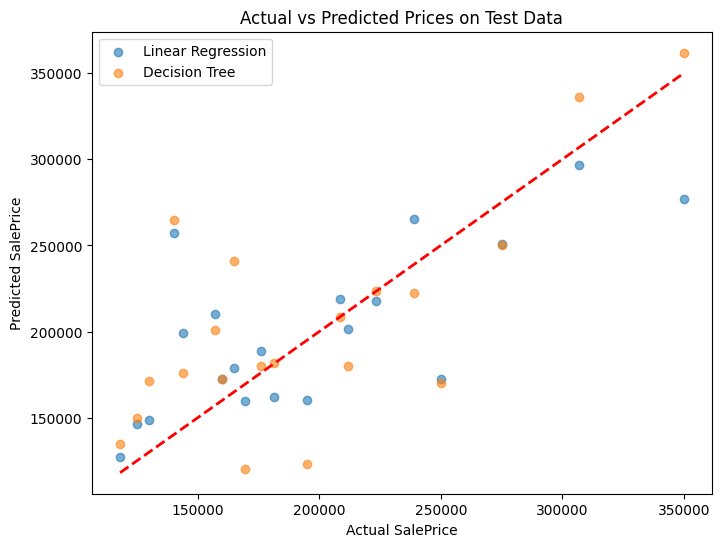

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, pred_test_lr, alpha=0.6, label='Linear Regression')
plt.scatter(y_test, pred_test_dt, alpha=0.6, label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Prices on Test Data")
plt.legend()
plt.show()

<h3 style="color:#117A65;">Result (Linear Regression – Test Data):</h3>
<blockquote> The Linear Regression model predicted sale prices on the new dataset with an R² Score of 0.522, explaining about 52.2% of the variation in house prices. </blockquote>
<p><b>Insight:</b> The model captures the general trend of house prices, but its predictive power decreased compared to training data (70.5%). This shows that some variation in new data isn’t fully captured by the linear relationship, likely due to differences or nonlinear patterns in the test set.</p>
<hr>
<h3 style="color:#117A65;">Result (Decision Tree – Test Data):</h3>
<blockquote> The Decision Tree model predicted the new dataset with an R² Score of 0.410, explaining only 41% of the variation in house prices. </blockquote> <p><b>Insight:</b> The tree overfitted the training data (R² ~0.9999), so it does not generalize well to unseen houses. Predictions vary more from actual prices, especially for houses unlike those in the training set.</p>
<hr>
<h3 style="color:#117A65;">Comparison:</h3>
<blockquote> On the test data, Linear Regression (R² 0.522) outperforms the Decision Tree (R² 0.410) in terms of generalization, despite having a lower training score. </blockquote>
<p><b>Insight:</b> Linear Regression is more reliable for unseen data, providing a reasonable estimate, while the Decision Tree overfits and struggles with new examples. For better generalization, consider using ensemble tree models like Random Forest or Gradient Boosting.</p>
<hr>